# GRIP : The Sparks Foundation

Data Science and Business Analytics

Piyush Ashok Lanjewar

Task1 : Prediction Using Supervised Machine Learning

# Step1 : Importing the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
print(df.shape)

(25, 2)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Step 2 : Data Visualization

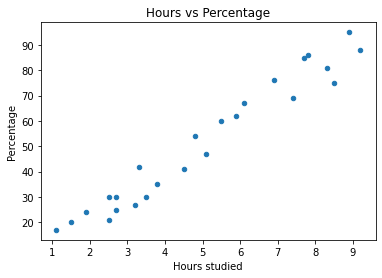

In [8]:
df.plot(kind = 'scatter' ,x = 'Hours' , y = 'Scores')
plt.xlabel('Hours studied')
plt.ylabel('Percentage')
plt.title('Hours vs Percentage')
plt.show()

In [9]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Linear Regression

# Step 3 : Data Prepration

Splitting the dataset into training and testing dataset

In [10]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [11]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [12]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

# Step 4 : Training Model

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

# Step 5 : Training the algorithm

We have splitted our data into training and testing sets now we will train our model

In [15]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

The training of the model is completed

In [16]:
model.fit(x_train , y_train)

LinearRegression()

# Step 6: Visualizing the Model

After training the model now its time to visualize it

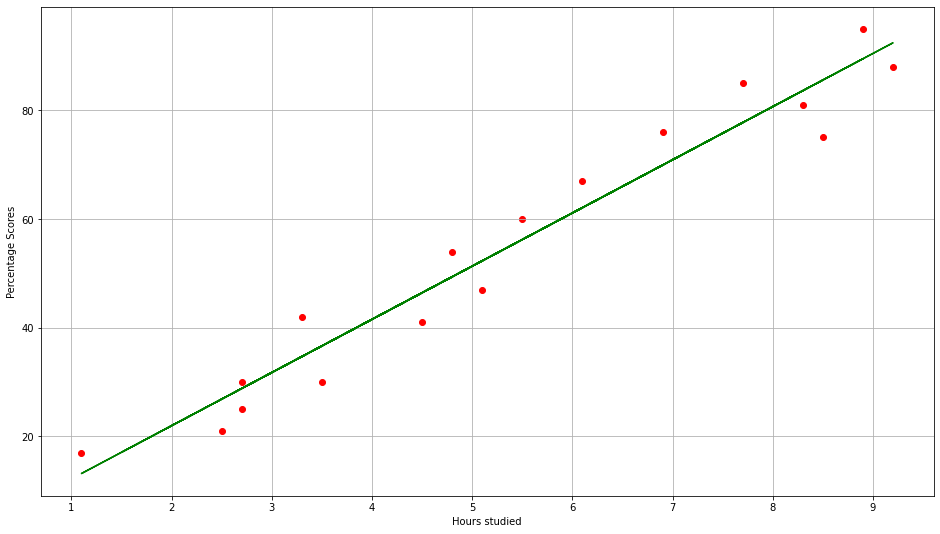

In [17]:
line = model.coef_*x + model.intercept_

#This is the plot for Testing data
plt.rcParams['figure.figsize'] = [16,9]
plt.scatter(x_train,y_train,color='red')
plt.plot(x,line,color='green');
plt.xlabel('Hours studied')
plt.ylabel('Percentage Scores')
plt.grid()
plt.show()


# Step 7 :  Making Predictions

In [18]:
y_pred = model.predict(x_test)
y_pred


array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

# Step 8 : Prediction between Actual and Predicted Value

In [19]:
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


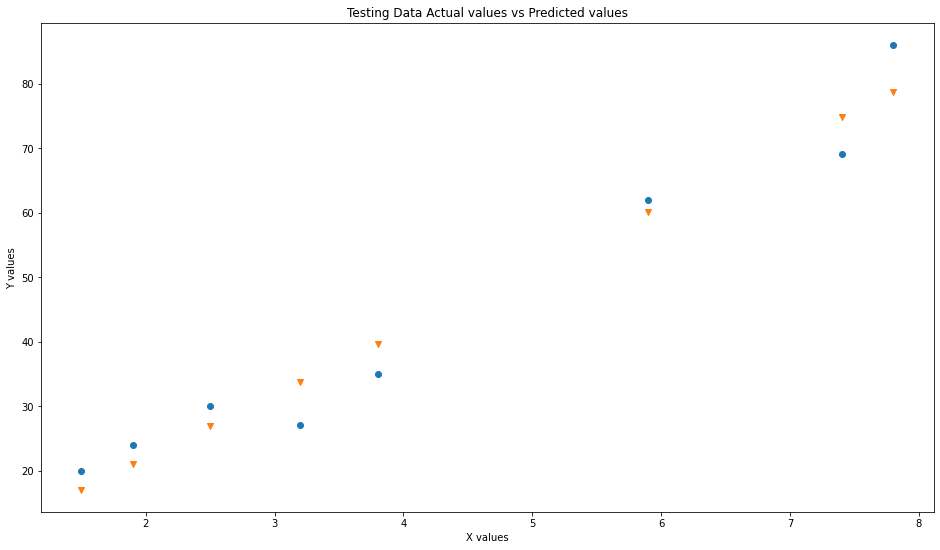

In [20]:
#Now lets visualize the predicted and actual values

plt.scatter(x_test,y_test)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Testing Data actual values')




plt.scatter(x_test,y_pred,marker='v')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Testing Data Actual values vs Predicted values')
plt.show()

In [21]:
# Testing with given data i.e for 9.25 hours/day

hours=9.25
given_data=model.predict([[hours]])
print('The predicted score of a person who study 9.25 hours per day is ',given_data)

The predicted score of a person who study 9.25 hours per day is  [92.91505723]


# Step 9 :  Evaluating the algorithm

In [22]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean squared error:', metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.419727808027652
Mean squared error: 22.96509721270043
Root mean squared error: 4.792191274636315
